<a href="https://colab.research.google.com/github/CamiloLon/Metodos_Computacionales_taller/blob/main/Quiz/Entregas/Londo%C3%B1o_Camilo_7189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega: La entrega de este examen se realizará a traves del git hub, en directorio https://github.com/hernansalinas/Metodos_Computacionales_taller/tree/main/Quiz/Entregas

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2m}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy import interpolate
from scipy import optimize

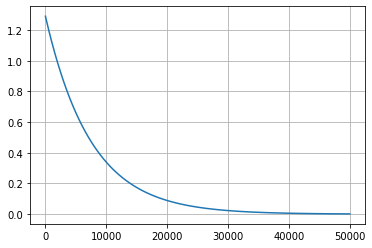

In [2]:
#Elaborar una gráfica de la densidad como función de la altura.
#ρ=ρ0exp(−y/λ); ρ0=1.29kg/m^3, λ=7482.2m
λ=7482.2
ρ0=1.29
def rho(x):
  return ρ0*np.exp(-y_/λ)
y_=np.linspace(0,50000,100)
plt.plot(y_, rho(y_))
plt.grid()
plt.show()




In [3]:
#Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista:
#d2ydt2=−g+k0v2exp(−y/λ)
#Condiciones iniciales:
m=60
A=0.3
h_=[30000,40000,50000,60000,70000]
k0=ρ0*A*0.8/(2*m)
#Función para el sistema de edo
def func(x,t):
  dx = x[1]    # dxdt=v 
  dv = -9.8+k0*x[1]**2*np.exp(-x[0]/λ) #dvdt
  return [dx,dv]
#Linspace para almacenar la data
x_=np.zeros((5,100))
v_=np.zeros((5,100))
t=np.linspace(0,300,100)
#Resolver para h diferentes
i=0
for i in range(5):
  x0=np.array([h_[i],0])
  x_[i]=odeint(func, x0 , t)[:,0]
  v_[i]=odeint(func, x0 , t)[:,1]


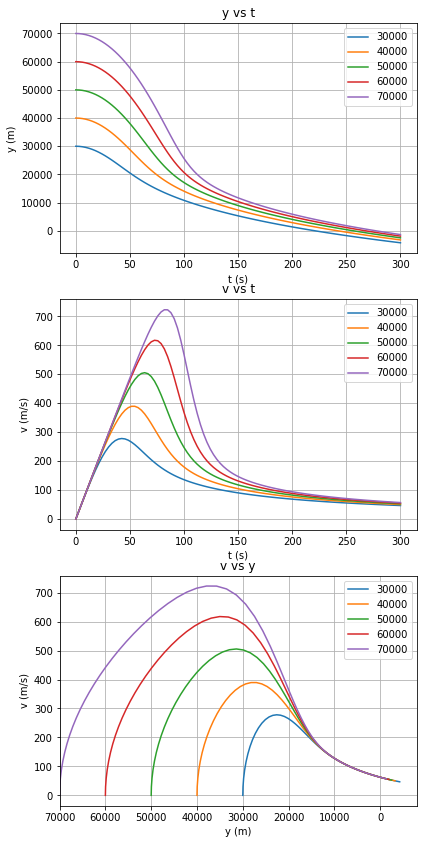

In [4]:
# Con la solucion de la ecuacion diferencial, elaborar una gráfica de.

plt.figure(figsize=(6.4,4.8*3))

# la posición como función del tiempo.
plt.subplot(311)
for i in range(5):
  plt.plot(t,x_[i],label=h_[i])
plt.title('y vs t')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.legend()
plt.grid()

# La velocidad como función del tiempo.
plt.subplot(312)
for i in range(5):
  plt.plot(t,-v_[i],label=h_[i])
plt.title('v vs t') 
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.legend()
plt.grid()

# La velocidad como función de la posición
plt.subplot(313)
for i in range(5):
  plt.plot(x_[i],-v_[i],label=h_[i])
plt.xlim(70000, plt.xlim()[0])
plt.title('v vs y')
plt.xlabel('y (m)')
plt.ylabel('v (m/s)')
plt.legend()
plt.grid()
plt.show()

Cuando la velocidad es máxima, $dv/dt=0$, i.e
\begin{equation}
0 = -g + k_0v^2 exp(-y/\lambda)
\end{equation}
En otras palabras:
\begin{equation}
v=e^{y/2\lambda}.\sqrt{\frac{g}{k_0}}
\end{equation}

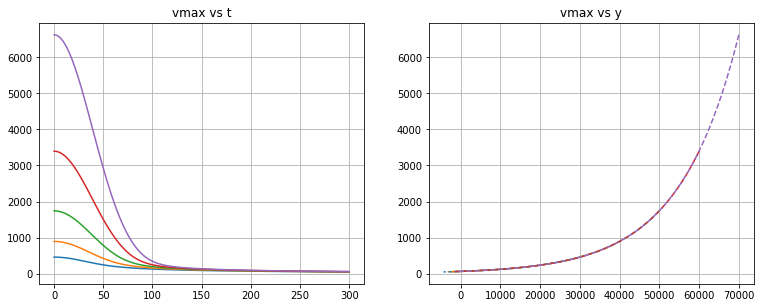


Esta gráfica NO es de vmax vs h.

Este gráfico representa qué velocidad máxima tendría el paracaídista si en
el punto independiente se ubicara la altura o tiempo a la que se empieza a 
disminuir la velocidad.

Podemos observar que para la altura los valores son exactemente iguales,
por la misma razón, es decir, si se quiere alcanzar la vmax a esa altura, 
esa debe ser la velocidad máxima


In [5]:
def V(x):
  return np.e**(x/(2*λ))*np.sqrt(9.8/k0)

plt.figure(figsize=(6.4*2,4.8))

plt.subplot(121)
for i in range(5):
  plt.plot(t,V(x_[i]))
plt.title('vmax vs t')
plt.grid()

plt.subplot(122)
for i in range(5):
  plt.plot(x_[i],V(x_[i]),'--')
plt.title('vmax vs y')
plt.grid()
plt.show()

print('''
Esta gráfica NO es de vmax vs h.

Este gráfico representa qué velocidad máxima tendría el paracaídista si en
el punto independiente se ubicara la altura o tiempo a la que se empieza a 
disminuir la velocidad.

Podemos observar que para la altura los valores son exactemente iguales,
por la misma razón, es decir, si se quiere alcanzar la vmax a esa altura, 
esa debe ser la velocidad máxima''')

In [6]:
#Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura
#array para almacenar los máximos
max=np.zeros((5,2))
for i in range(5):
  #Interpolación para cada data de velocidades en función del tiempo
  P=interpolate.CubicSpline(t,v_[i])
  #Tiempo para el máximo
  max[i,0]=optimize.fmin_powell(P,0,full_output=True)[0]
  #Valor de vmax
  max[i,1]=-optimize.fmin_powell(P,0,full_output=True)[1]

Optimization terminated successfully.
         Current function value: -278.163999
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -278.163999
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -390.007361
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -390.007361
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -505.472453
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -505.472453
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -617.713451
         Iterations: 2
         Function evaluations: 38
Optimization termina

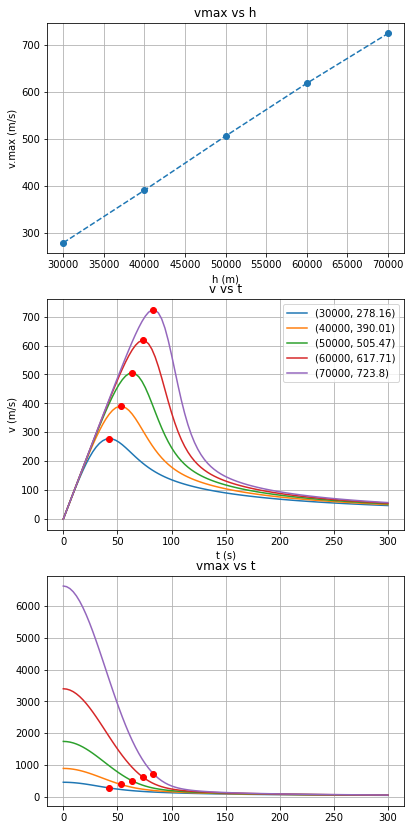


En la última gráfica podemos apreciar que los valores numéricos para cada
tiempo de velocidad máxima, concuerdan con cada curva de velocidad máxima 
respecto al tiempo como en el bloque anterior. Es decir, estos valores están
totalmente acordes con lo que se preveía desde la función anterior. 
Recordar siempre que estos valores no pueden ser obtenidos de la función anterior
sino numéricamente y que se debe interpretar en ese orden, primero la función
con valores generales pero no conocidos para este caso y luego la solución particular


In [7]:
#Realice un grafico de la velocidad maxima como función de la altura de caida.


plt.figure(figsize=(6.4,4.8*3))

plt.subplot(311)
plt.plot(h_, max[:,1], '--o')
plt.grid()
plt.xlabel('h (m)')
plt.ylabel('v.max (m/s)')
plt.title('vmax vs h')

plt.subplot(312)
for i in range(5):
  plt.plot(t, -v_[i], label=(h_[i],round(max[i,1],2)))
plt.plot(max[:,0],max[:,1],'ro')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('v vs t')
plt.grid()

#Gráfica de Vmax(y) situando los máximos
plt.subplot(313)
for i in range(5):
  plt.plot(t,V(x_[i]))
plt.plot(max[:,0],max[:,1],'ro')
plt.title('vmax vs t')
plt.grid()

plt.show()
print('''
En la última gráfica podemos apreciar que los valores numéricos para cada
tiempo de velocidad máxima, concuerdan con cada curva de velocidad máxima 
respecto al tiempo como en el bloque anterior. Es decir, estos valores están
totalmente acordes con lo que se preveía desde la función anterior. 
Recordar siempre que estos valores no pueden ser obtenidos de la función anterior
sino numéricamente y que se debe interpretar en ese orden, primero la función
con valores generales pero no conocidos para este caso y luego la solución particular''')

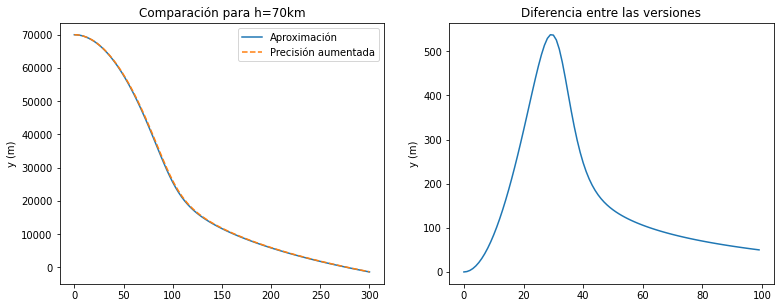

In [8]:
#Reto:
G=6.67e-11
M=5.98e24
R=6371000
def func1(x,t):
  dx = x[1]    # dxdt=v 
  dv = -G*M/(R+x[0])**2+k0*x[1]**2*np.exp(-x[0]/λ) #dvdt
  return [dx,dv]

x1_=np.zeros((5,100))
v1_=np.zeros((5,100))

for i in range(5):
  x0=np.array([h_[i],0])
  x1_[i]=odeint(func1, x0 , t)[:,0]
  v1_[i]=odeint(func1, x0 , t)[:,1]

plt.figure(figsize=(6.4*2,4.8))
plt.subplot(121)
plt.plot(t,x_[-1], label='Aproximación')
plt.plot(t,x1_[-1], '--', label='Precisión aumentada')
plt.title('Comparación para h=70km')
plt.ylabel('t (s)')
plt.ylabel('y (m)')
plt.legend()

plt.subplot(122)
plt.plot(abs(x1_[-1]-x_[-1]))
plt.title('Diferencia entre las versiones')
plt.ylabel('y (m)')
plt.show()